# Lab | Text Generation from Shakespeare's Sonnet

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
import urllib.request

url = "https://www.gutenberg.org/cache/epub/1041/pg1041.txt"
filename = "sonnets.txt"

urllib.request.urlretrieve(url, filename)

# Read the file
with open(filename, "r", encoding="utf-8") as f:
    text = f.read()

print(text[:500])  # show first 500 characters


The Project Gutenberg eBook of Shakespeare's Sonnets
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook


In [10]:
import urllib.request

url_modern = "https://www.gutenberg.org/files/1342/1342-0.txt"
response_modern = urllib.request.urlopen(url_modern)
data = response_modern.read().decode("utf-8")

print(modern_data[:500])  # Show first 500 characters


*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***
                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]



In [11]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [12]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


c:\Programming\Ironhack\ai\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
3766/3766 ━━━━━━━━━━━━━━━━━━━━ 144s 36ms/step - accuracy: 0.0395 - loss: 6.5818
Epoch 2/100
 258/3766 ━━━━━━━━━━━━━━━━━━━━ 2:10 37ms/step - accuracy: 0.0511 - loss: 6.2815

KeyboardInterrupt: 

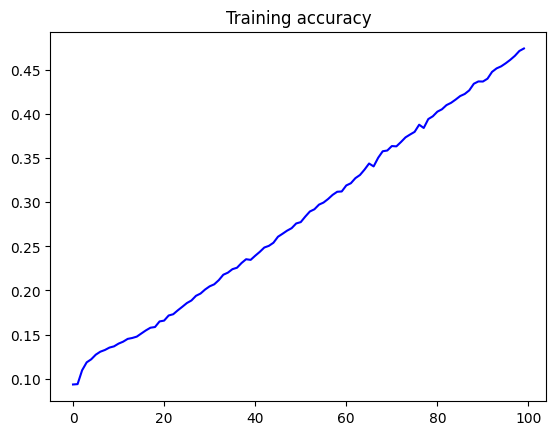

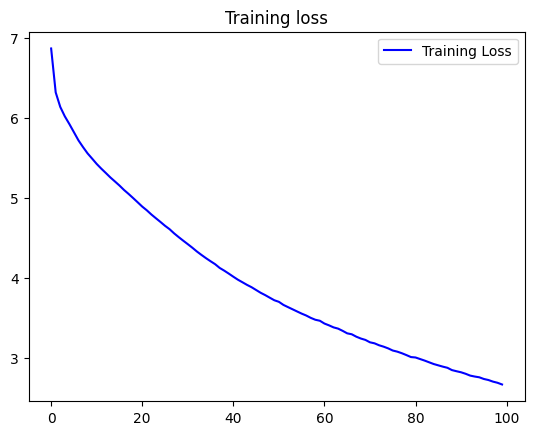

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np

seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # use predict + argmax instead of predict_classes
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word + " "

print(seed_text)


  propheciesire  propheciesropheciessonnets  methods  prophecies
